# 11주차 과제
- 60171100 윤민혁

In [1]:
import requests
import pandas as pd
from bs4 import BeautifulSoup
import re
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import matplotlib.pyplot as plt
import urllib.request
from konlpy.tag import Okt # 형태소 분석기
from gensim.models.word2vec import Word2Vec

In [101]:
pre = 'https://movie.naver.com/movie/bi/mi/pointWriteFormList.naver?code=68555&type=after&isActualPointWriteExecute=false&isMileageSubscriptionAlready=false&isMileageSubscriptionReject=false&page='
review=[]
rate=[]

for i in range(1,3780, 8):
    site = pre + str(i)
    res = requests.get(site)
    soup = BeautifulSoup(res.content,'html.parser')
    
    id_list = []
    id_pre = '_filtered_ment_'
    
    for i in range(10):
        id_list.append(id_pre+str(i))
   
    for id in id_list:
        review.append(soup.find('span',{'id':id}).get_text().strip())
        
    rate_list = []
    rate_list = (soup.select('div.star_score > em'))
    
    for r in rate_list:
        r = int(re.sub('<.+?>','',str(r)))
        rate.append(r)

        
df = pd.DataFrame({'review':review,'rate':rate})

In [102]:
df.to_csv('./data/review.csv')

In [103]:
df

,review,rate
0,"이게 진짜 명작이다.... 보기전, 대만영화라서 편견이 있었는데, 완전히 반성한다....",10
1,몇번봐도 너무 재미씀,10
2,이런 영화 다시 안나오나..?,10
3,너무너무좋아...,10
4,영화 전문가들은 대체 어느영화에 10점을 줄지 궁금하다,10
...,...,...
4725,중반까지는 짱짱이였는데 갑자기 뭔 SF여;;,8
4726,잘만든영화지만....감독및남주늠이 일빠늠이고 한국에대한 악의적 말도해서 2점준다,2
4727,내 인생영화... 적당한 신파에 개연성있는 내용,10
4728,오글거리는 대사와 자전거뒤에 타고 가면서 앉아서 남친 이랑 사랑을 꿈꾸는 순정만화스...,4


In [104]:
train_data = pd.read_csv('./data/review.csv')
train_data = train_data.dropna(how = 'any')# 널값 행 제거
print(train_data.isnull().values.any()) # 널값 확인

False


In [112]:
#불용어 정리
train_data['review'] = train_data['review'].str.replace("[^ㄱ-하-ㅣ가-힣]","")

stopwords = ['의','가','이','은','들','는','좀','잘','걍','과','도',
             '를','으로','자','에','와','한','하다','이다','와','이네',
             '또','임','에서','나','했다','와','로','ㅋㅋ','ㅠㅠ','ㅜㅜ',
             'ㅎㅎ','ㅡㅡ','오다','보다','없다','영화','이영화','않다']

In [113]:
train_data.head()

,Unnamed: 0,review,rate
0,0,이게진짜명작이다보기전대만영화라서편견이있었는데완전히반성한다,10
1,1,몇번봐도너무재미씀,10
2,2,이런영화다시안나오나,10
3,3,너무너무좋아,10
4,4,영화전문가들은대체어느영화에점을줄지궁금하다,10


In [114]:
okt = Okt()
tokenized_data = []

for sentence in train_data['review']:
    temp_X = okt.morphs(sentence, stem=True)
    temp_X = [word for word in temp_X if not word in stopwords]
    temp_X = [word for word in temp_X if len(word)>1]
    tokenized_data.append(temp_X)

In [115]:
tokenized_data

[['진짜', '명작', '보기', '대만', '라서', '편견', '있다', '완전하다', '반성'],
 ['몇번', '너무', '재미', '쓰다'],
 ['이런', '달다'],
 ['너무', '너무', '좋다'],
 ['전문가', '대체', '어느', '궁금하다'],
 [],
 ['주걸륜', '진짜', '천재', '같다'],
 ['명작', '지금', '미안하다', '정도'],
 ['진짜', '이건', '진짜', '말로', '표현', '진짜', '주걸륜', '너무', '대단하다', '생각', '밖에는'],
 ['만이', '무섭다', '마지막', '무서움'],
 ['처음',
  '정말',
  '충격',
  '도가니',
  '때문',
  '만여',
  '돼다',
  '담강',
  '중학교',
  '진리',
  '대학',
  '단수이',
  '에가',
  '서영',
  '여운',
  '즐기다',
  '몇번',
  '재미있다',
  '강추'],
 ['대사',
  '외우다',
  '버리다',
  '하품',
  '처럼',
  '나른하다',
  '영상',
  '분위기',
  '조용하다',
  '전개',
  '피아노',
  '주영',
  '빠져들다',
  '모든',
  '요소',
  '그리고',
  '무엇',
  '느끼다',
  '감정',
  '일렁임',
  '몇번',
  '이고',
  '찾다',
  '되다'],
 ['다시', '감동'],
 ['완전', '감동', '다시', '계륜미'],
 ['훌륭하다'],
 ['잔잔하다', '여운', '남다'],
 ['아름답다', '판타지영화', '피아노', '선율', '끝나다', '잔잔하다', '남다'],
 ['본대', '단연', '코위'],
 ['피아노', '배틀', '유명하다', '그것', '시보', '정말', '명작'],
 ['피아노', '알다', '오늘', '드디어', '정말', '감동', '마지막', '열리다', '결말', '여운', '남기다', '주다'],
 ['하나', '공감', '재미있다', '건지다', '모르다'],
 

리뷰의 최대 길이: 31
리뷰의 평균 길이: 4.743905024379902


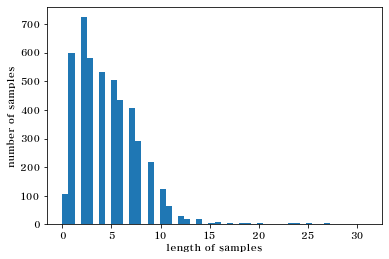

In [116]:
# 리뷰 길이 분포 확인
print('리뷰의 최대 길이:' ,max(len(I) for I in tokenized_data))
print('리뷰의 평균 길이:', sum(map(len, tokenized_data))/len(tokenized_data))
plt.hist([len(s) for s in tokenized_data], bins = 50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [117]:
from gensim.models import Word2Vec

model = Word2Vec(sentences= tokenized_data, size = 100, window= 5, min_count=3,workers=4,sg=0)
model.wv.vectors.shape

(1069, 100)

In [118]:
print(model.wv.most_similar('피아노'))
print(model.wv.most_similar('감동'))
print(model.wv.most_similar('학교'))
print(model.wv.most_similar('대만'))
print(model.wv.most_similar('주걸륜'))
print(model.wv.most_similar('계륜미'))
print(model.wv.most_similar('인생'))
print(model.wv.most_similar('음악'))
print(model.wv.most_similar('배틀'))
print(model.wv.most_similar('사랑'))

[('음악', 0.9998530745506287), ('좋다', 0.9998505115509033), ('평점', 0.9998412728309631), ('너무', 0.9998406171798706), ('정말', 0.9998397827148438), ('사랑', 0.9998396635055542), ('되다', 0.999835729598999), ('보고', 0.9998302459716797), ('가슴', 0.9998294711112976), ('사람', 0.9998255372047424)]
[('좋다', 0.9998797178268433), ('너무', 0.9998788237571716), ('사람', 0.9998716115951538), ('같다', 0.9998701810836792), ('사랑', 0.9998598098754883), ('가슴', 0.9998535513877869), ('느낌', 0.9998525381088257), ('처음', 0.9998462200164795), ('멜로', 0.9998446702957153), ('정말', 0.9998438358306885)]
[('느낌', 0.9992910027503967), ('감동', 0.999290943145752), ('스토리', 0.9992859363555908), ('마지막', 0.9992756247520447), ('보고', 0.9992716908454895), ('들다', 0.9992631673812866), ('정말', 0.999259889125824), ('이런', 0.9992592334747314), ('반전', 0.9992526769638062), ('좋다', 0.9992523193359375)]
[('자다', 0.9989374876022339), ('이렇게', 0.9989246129989624), ('감동', 0.9989175796508789), ('시간', 0.9989048838615417), ('처음', 0.998903214931488), ('진짜', 0.99890303

- 영화의 주요 소재인 피아노가 모든 키워드와 유사도가 높은 것을 알 수 있었다. 모든 키워드에서 긍정적인 단어들이 많이 나왔다. 
- 또한 생각보다 많은 키워드에서 반전이라는 단어와의 유사도가 높은 것을 알 수 있었다. 
- 사랑이라는 단어에서는 주걸륜과 계륜미와의 유사도가 높을 것으로 생각 되었지만 가장 높은 유사도를 가지고 있지 않은 것을 확인할 수 있었다.

In [97]:
model2 = Word2Vec(sentences=tokenized_data, size=100, window=2, min_count=40, workers=4,sg=0)

word_vectors = model2.wv

vocabs = list(word_vectors.vocab.keys())
word_vectors_list = [word_vectors[v] for v in vocabs]
print(vocabs)

['진짜', '명작', '있다', '너무', '재미', '이런', '좋다', '주걸륜', '같다', '지금', '정도', '생각', '마지막', '여운', '남다', '최고다', '스토리', '않다', '추천', '필요없다', '가슴', '정말', '사랑', '계륜미', '음악', '최고', '아니다', '평점', '주인공', '반전', '인생', '다시', '결말', '되다', '재미있다', '이쁘다', '재밌다', '주다', '후회', '싶다', '가다', '그냥', '피아노', '배틀', '알다', '아름답다', '감동', '한번', '까지', '보고', '연주', '넘다', '멜로', '모르다', '재다', '멋지다', '완전', '대박', '하고', '처음', '이해', '멋있다', '슬프다', '에요', '눈물', '굳다']


In [98]:
model2.wv.vectors.shape

(66, 100)

In [99]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
xys = pca.fit_transform(word_vectors_list)
xs = xys[:,0]
ys = xys[:,1]

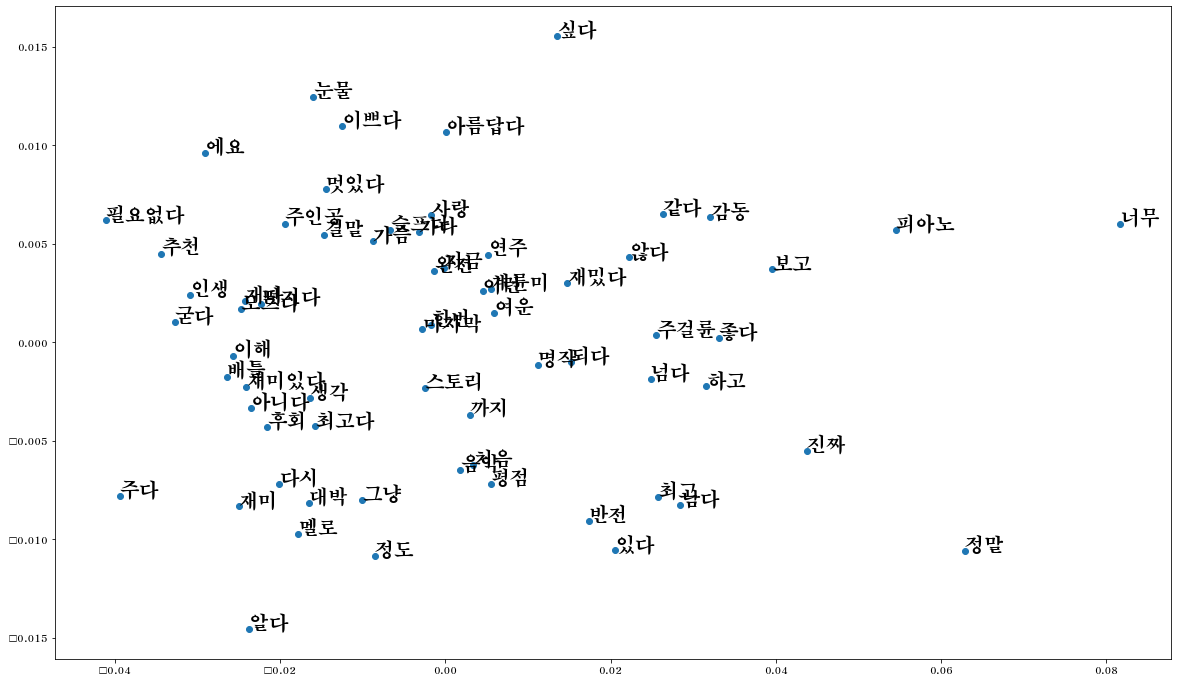

In [100]:
from matplotlib import font_manager, rc
font_path = 'C:/Windows/Fonts/H2MJRE.TTF'
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family = font)

plt.figure(figsize=(20,12))
plt.scatter(xs,ys,marker='o')
for i,v in enumerate(vocabs):
    plt.annotate(v,xy=(xs[i], ys[i]), fontsize=20)

- '가슴', '슬픔', '사랑', '멋있다' 등의 단어가 비슷한 위치에 모여있는 것을 확인할 수 있다. 이는 유사성이 높기 때문인것을 알 수 있다. '재미', '다시', '대박', '멜로' 또한 유사성이 높은 단어들 끼리 비슷한 위치에 있는 것을 볼 수 있다.